In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
def create_matrix(target_url):
    data = requests.get(target_url)
    data=data.content.decode('utf-8').splitlines()
    chunks = [ data[i:i + 28] for i in range(0, len(data), 28) ]
    matrix=[]
    for chunk in chunks:
        L=[]
        for line in chunk:
            for ch in line:
                if ch==' ':
                    #print('space')
                    L.append(0)
                elif ch=='+' or ch=='#':
                    L.append(1)
        matrix.append(L)
    return matrix
train_path = 'https://raw.githubusercontent.com/akramshaik2326/NN_CV/master/Datasets/trainingimages.txt'
test_path = 'https://raw.githubusercontent.com/akramshaik2326/NN_CV/master/Datasets/testimages.txt'
train_matrix = create_matrix(train_path)
test_matrix = create_matrix(test_path)

In [3]:
print(len(train_matrix))
print(len(train_matrix[0]))
print(len(test_matrix))
print(len(test_matrix[0]))

5000
784
1000
784


In [4]:
def create_label(target_url):
    data = requests.get(target_url)
    data=data.content.decode('utf-8').splitlines()
    label = [ int(i) for i in data ]
    return label

In [5]:
train_label_path="https://raw.githubusercontent.com/akramshaik2326/NN_CV/master/Datasets/traininglabels.txt"
test_label_path="https://raw.githubusercontent.com/akramshaik2326/NN_CV/master/Datasets/testlabels.txt"
train_label=create_label(train_label_path)
test_label=create_label(test_label_path)

In [6]:
print(len(train_label))
print(len(test_label))

5000
1000


In [7]:
train_array=np.array(train_matrix)
test_array=np.array(test_matrix)
train_labelarray=np.array(train_label)
test_labelarray=(test_label)

In [8]:
train_set=np.column_stack((train_array, train_labelarray))
test_set=np.column_stack((test_array, test_labelarray))

In [9]:
print('length of train_labelarray : ',len(train_labelarray))
#print(train_set)
print('Train set shape: ', train_set.shape)
print('Test set shape: ', test_set.shape)

length of train_labelarray :  5000
Train set shape:  (5000, 785)
Test set shape:  (1000, 785)


In [10]:
# Split the dataset by class values, returns a dictionary
def group_labels(dataset):
    grouped = dict()
    for i in range(len(dataset)):
        row = dataset[i]
        label = row[-1]
        if (label not in grouped):
            grouped[label] = list()
        grouped[label].append(row[:-1])
    return grouped
grouped_data = group_labels(train_set)

In [11]:
print(len(grouped_data))
print(len(grouped_data[0]))
print(len(grouped_data[0][0]))

10
479
784


In [12]:
def calculate_likelihood(label_data):
    p_xy = []
    for i in range(784):
        count0 = 0
        count1 = 0
        for row in label_data:
            if row[i] == 0:
                count0 += 1
            else:
                count1 += 1
        likelihood = [(count0 + 0.1)/(len(label_data) + 0.2), (count1 + 0.1)/(len(label_data) + 0.2)]
        p_xy.append(likelihood)    
    return p_xy

In [13]:
def summarize_by_class(grouped_data):
    Naivebayes_model = dict()
    for label, label_rows in grouped_data.items():
        p_y = len(label_rows)/5000
        p_xy = calculate_likelihood(label_rows)
        #p_y = calculate_class_py(rows)
        Naivebayes_model[label] = [p_xy, p_y]
    return Naivebayes_model
Naivebayes_model = summarize_by_class(grouped_data)

In [14]:
#print(len(Naivebayes_model[5][0]))
#for key, value in Naivebayes_model.items():
#    print(key)
#    if key==5:
#        print(value)

In [15]:
import numpy as np
def calculate_class_probabilities(Naivebayes_model, sample_row):
    probabilities = dict()
    for label, label_values in Naivebayes_model.items():
        probabilities[label] = np.log(label_values[1])
        for i in range(784):
            probabilities[label] += np.log(label_values[0][i][int(sample_row[i])])
    return probabilities

In [16]:
#calculate_class_probabilities(Naivebayes_model, test_set[0][:-1])

In [17]:
#print(test_set[0])
#model[0][70][70]

In [18]:
#test_set[0][:]

In [19]:
def predict(Naivebayes_model, row):
    probabilities = calculate_class_probabilities(Naivebayes_model, row)
    #print(probabilities)
    best_probab = 0
    best_label = None
    for class_value, probability in probabilities.items():
        if (best_label == None) or (probability > best_probab):
            best_probab = probability
            best_label = class_value
    return best_label

In [20]:
predictions=[]
actual=[]
for row in test_set:
    actual.append(row[-1])
    predictions.append(predict(Naivebayes_model, row[:-1]))

In [21]:
count= sum(1 for i in range(len(actual)) if actual[i]==predictions[i])
accuracy = count / float(len(actual)) * 100.0
print("Test Accuracy is: %.2f percent!" %accuracy )

Test Accuracy is: 77.300 percent!


In [22]:
df=pd.DataFrame()
df['Actual']=actual
df['Predicted']=predictions
df.head(30)

,Actual,Predicted
0,9,7
1,0,0
2,2,2
3,5,3
4,1,1
5,9,9
6,7,7
7,8,8
8,1,1
9,0,0


In [23]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual,predictions)
#cm

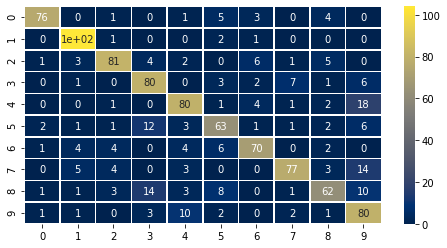

In [24]:
plt.figure(figsize = (8,4))
sn.heatmap(cm, annot=True, linewidths=.5, cmap="cividis")

In [25]:
#pip install pyplot

In [26]:
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#fig = make_subplots()
#fig.add_trace( go.Table( header=dict(values=["S.No", "Actual", "Predicted"],font=dict(size=10)),cells=dict(values=[df[k].tolist() for k in df.columns[:]])))
#fig.update_layout(height=500)